In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
randomState=4

np.random.seed(randomState)

X = np.random.normal(10,6,size=(50,1))
Y = 21*X + 4 + np.random.normal(2,15,size=(50,1))

##### Raw

In [101]:
Xt = X.transpose()
XtX = np.dot(Xt,X)
XtX_inv = np.linalg.inv(XtX)
XtX_invXt= np.dot(XtX_inv,Xt)


betas = np.dot(XtX_invXt,Y)
prediction = np.dot(X,betas)
error = Y-prediction

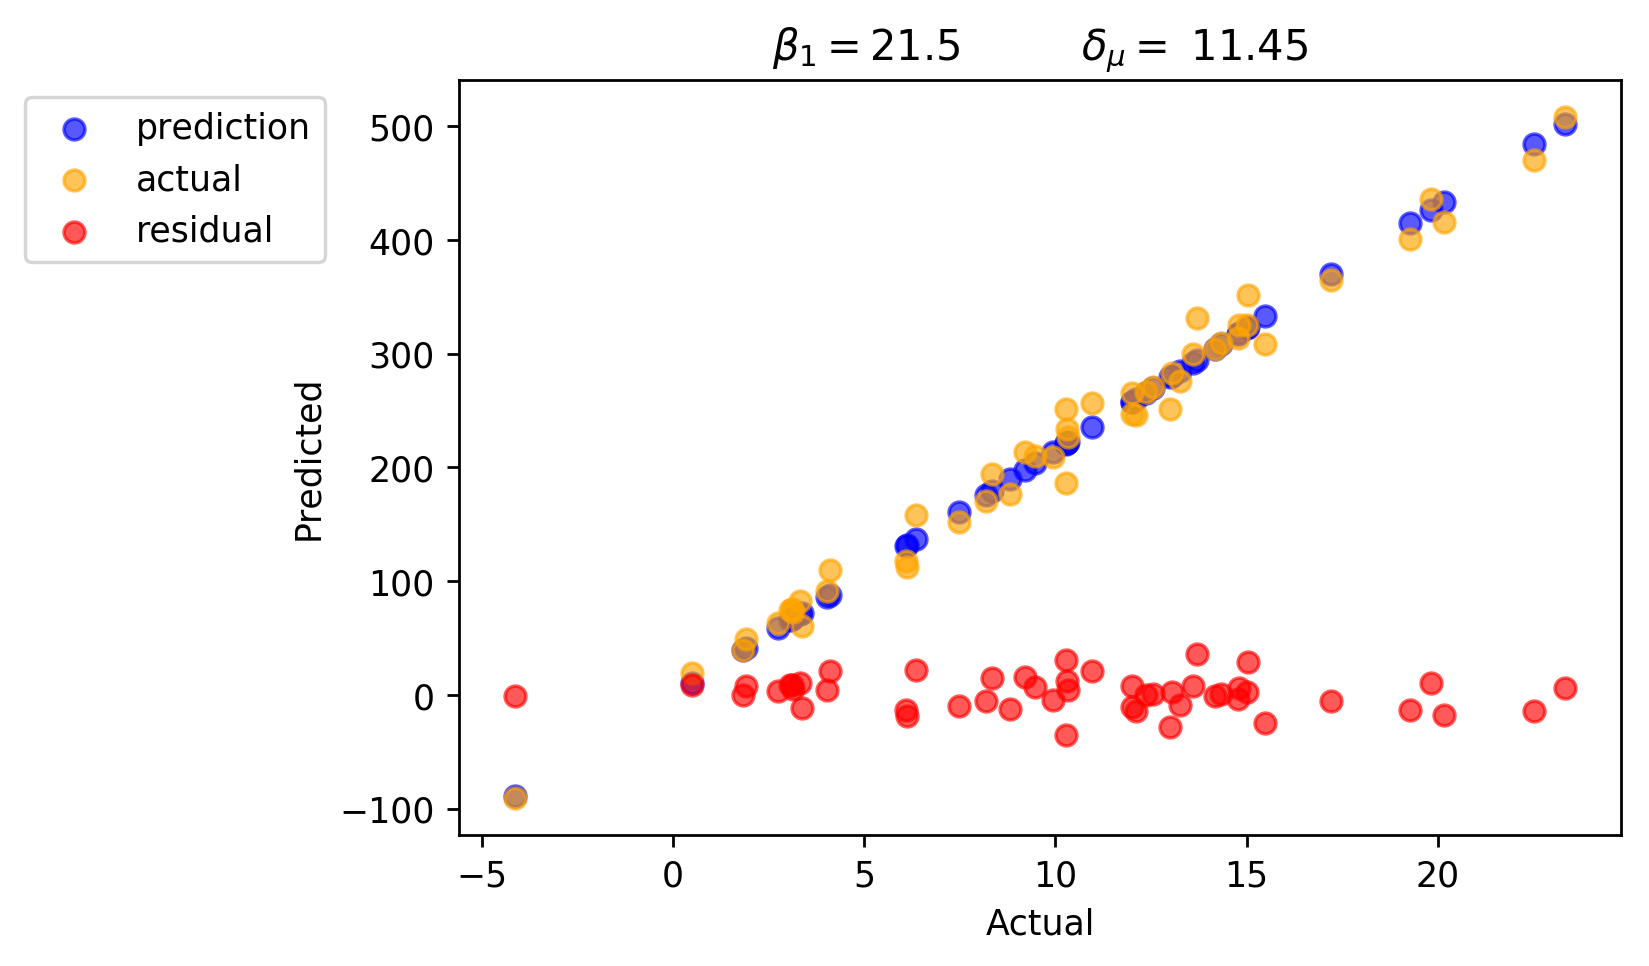

In [104]:
plt.figure(figsize=(6,4), dpi=250)

plt.scatter(X,prediction,c='blue',alpha=0.65)
plt.scatter(X,Y,c='orange',alpha=0.65)
plt.scatter(X,error,c='red',alpha=0.65)
plt.legend(['prediction','actual','residual'], bbox_to_anchor=(-0.1,1))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear regression \n'+r'$\beta_1 = $' + str(betas.round(2)[0,0]));
plt.title( r'$\beta_1 = $' + str(betas.round(2)[0,0]) +'\t'+r' $\delta_{\mu} = $ '+ str(np.round(np.abs(error).mean(),2)));

##### Intercept

In [99]:
X_c = np.concatenate([X,np.ones_like(X)],axis=1)
Xt = X_c.transpose()
XtX = np.dot(Xt,X_c)
XtX_inv = np.linalg.inv(XtX)
XtX_invXt= np.dot(XtX_inv,Xt)


betas = np.dot(XtX_invXt,Y)
prediction = np.dot(X_c,betas)
error=Y-prediction

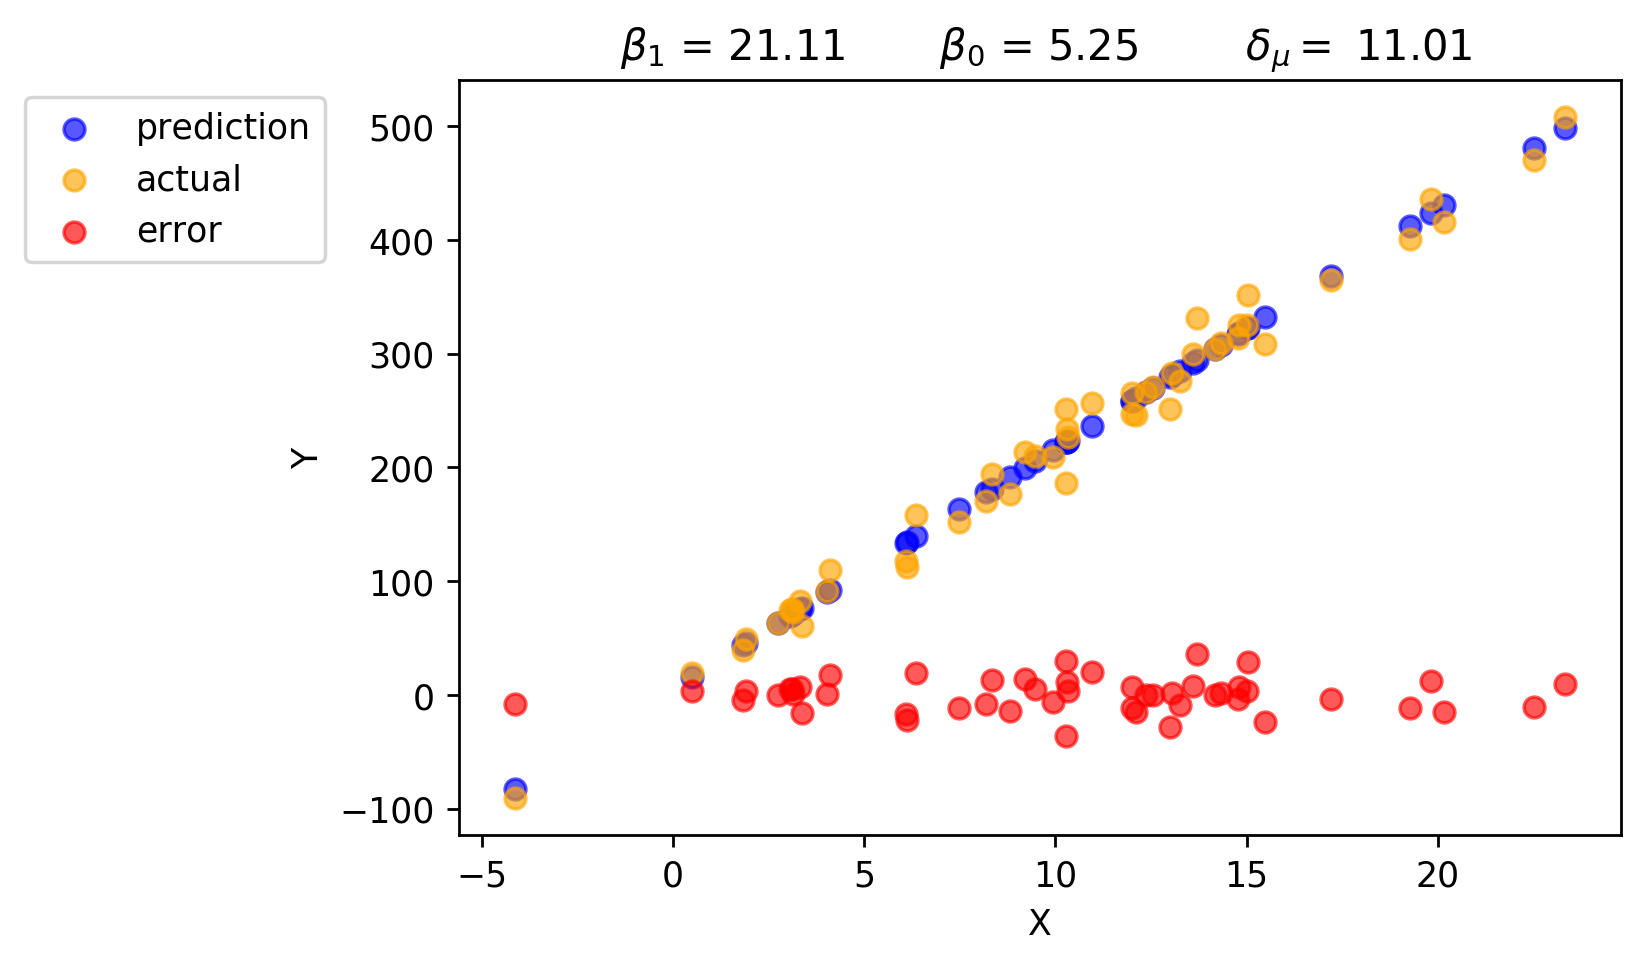

In [100]:
b1 = betas.round(2)[0,0]
bo = betas.round(2)[1,0]

plt.figure(figsize=(6,4), dpi=250)

plt.scatter(X_c[:,0], prediction, c='blue',alpha=0.65)
plt.scatter(X_c[:,0],Y, c='orange', alpha=0.65)
plt.scatter(X_c[:,0], error, c='red', alpha=0.65)
plt.legend(['prediction','actual','error'], bbox_to_anchor=(-0.1,1));
plt.xlabel('X')
plt.ylabel('Y')
plt.title( r' $\beta_1$ = ' +str(b1)+'\t'+r' $\beta_0$ = ' +str(bo)+'\t' +r' $\delta_{\mu} = $ '+str(np.round(np.abs(error).mean(),2)));

##### Intercept & Normalized $X_i$

In [88]:
X_n = (X-X.mean())*1.0/X.std()
X_c = np.concatenate([X_n, np.ones_like(X_n)],axis=1)

Xt = X_c.transpose()
XtX = np.dot(Xt,X_c)
XtX_inv = np.linalg.inv(XtX)
XtX_invXt= np.dot(XtX_inv,Xt)


betas = np.dot(XtX_invXt,Y)
prediction = X_c[:,0]*betas[0] + X_c[:,1]*betas[1]
error = Y.flatten()-prediction.flatten()

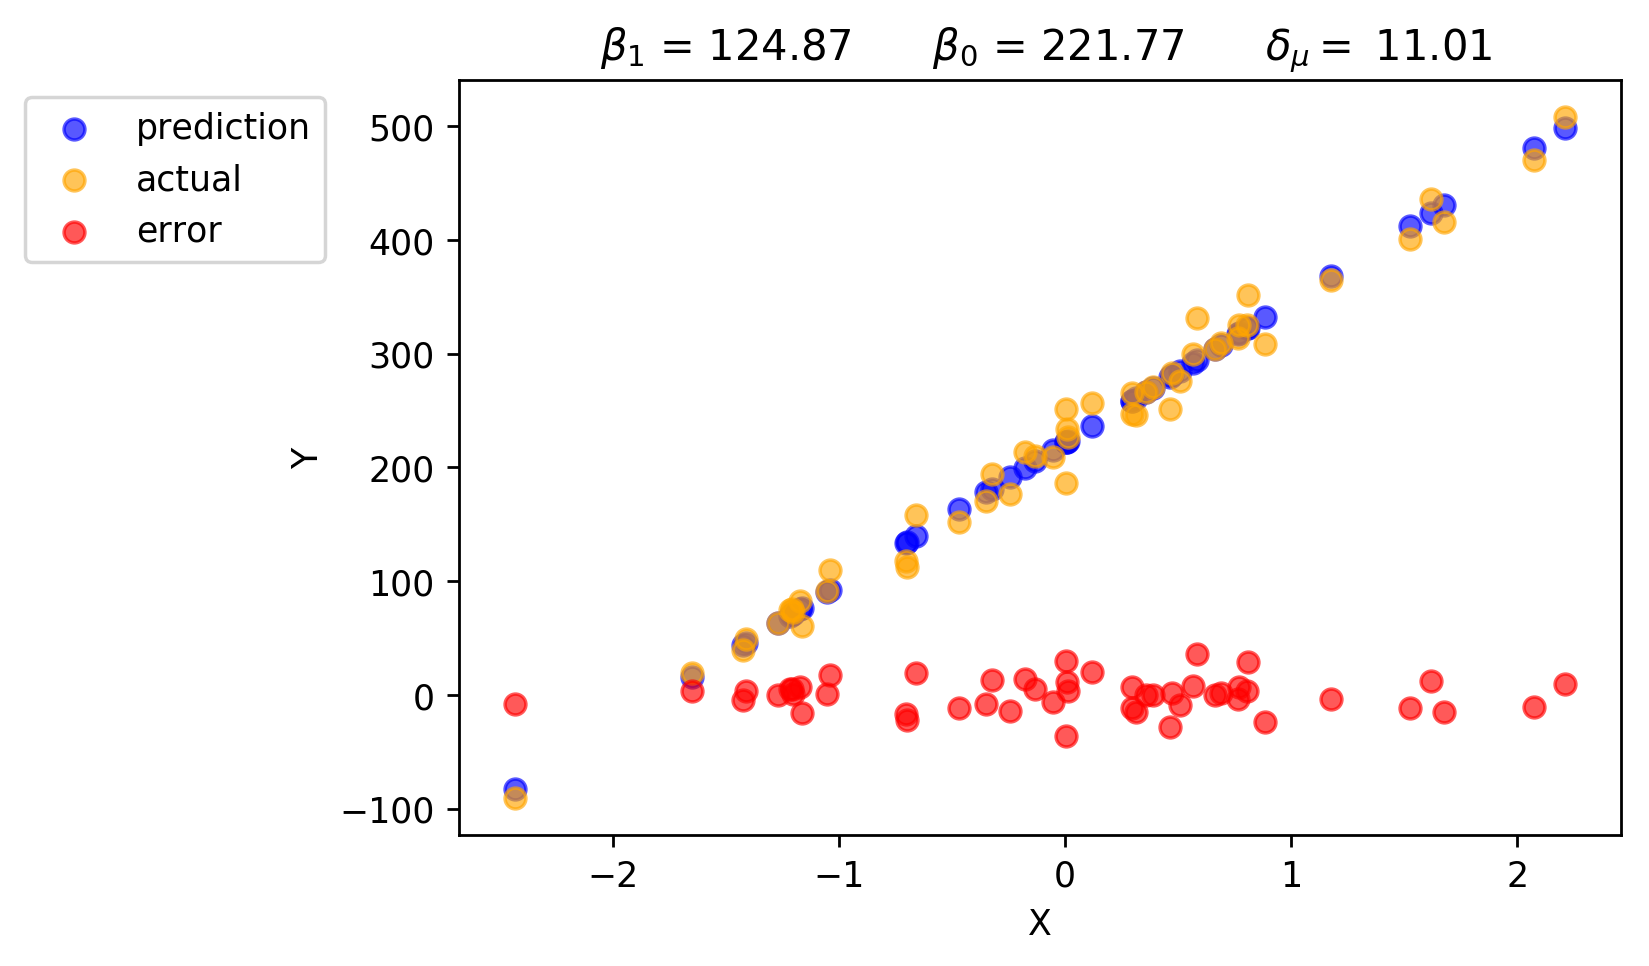

In [96]:
b1 = betas.round(2)[0,0]
bo = betas.round(2)[1,0]

plt.figure(figsize=(6,4), dpi=250)

plt.scatter(X_c[:,0], prediction, c='blue',alpha=0.65)
plt.scatter(X_c[:,0],Y, c='orange', alpha=0.65)
plt.scatter(X_c[:,0], error, c='red', alpha=0.65)
plt.legend(['prediction','actual','error'], bbox_to_anchor=(-0.1,1));
plt.xlabel('X')
plt.ylabel('Y')
plt.title( r' $\beta_1$ = ' +str(b1)+'\t'+r' $\beta_0$ = ' +str(bo)+'\t' +r' $\delta_{\mu} = $ '+str(np.round(np.abs(error).mean(),2)));